In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Load the dataset into a Pandas DataFrame
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv(r'/content/drive/MyDrive/Project/FinalBalancedDataset.csv')
# Download the dataset manually from Kaggle and load it into a DataFrame
# Assuming the file is named 'toxic_tweets.csv'


Mounted at /content/drive


In [ ]:
# Step 2: Convert text to Bag of Words and TF-IDF
X = df['tweet']
y = df['Toxicity']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Bag of Words
count_vectorizer = CountVectorizer()
X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)

In [ ]:
# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Step 3: Apply prediction methods
# Initialize classifiers
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
nb_classifier = MultinomialNB()
knn_classifier = KNeighborsClassifier()
svm_classifier = SVC()

classifiers = [dt_classifier, rf_classifier, nb_classifier, knn_classifier, svm_classifier]
classifier_names = ['decision-tree','Random-Forest','Navie-Bayes','K-NN', 'SVM']


Metrics for decision-tree with Bag of Words:
Precision: 0.9281275890637946
Recall: 0.9188025425466475
F1-Score: 0.9234415249871201
Confusion Matrix:
[[6125  347]
 [ 396 4481]]
ROC-AUC: 0.932593483881482


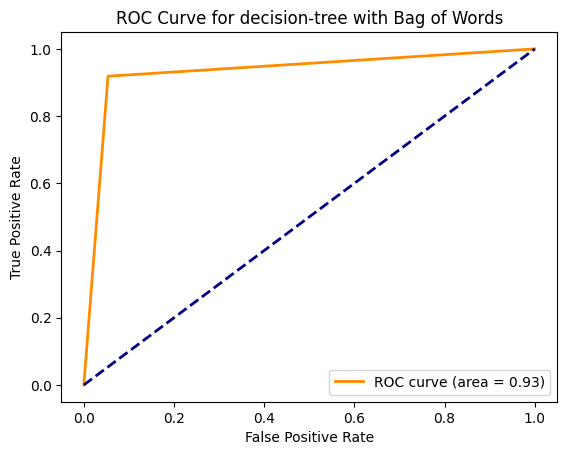


Metrics for decision-tree with TF-IDF:
Precision: 0.9141331142152835
Recall: 0.9124461759278245
F1-Score: 0.913288866085172
Confusion Matrix:
[[6054  418]
 [ 427 4450]]
ROC-AUC: 0.9239301336993881


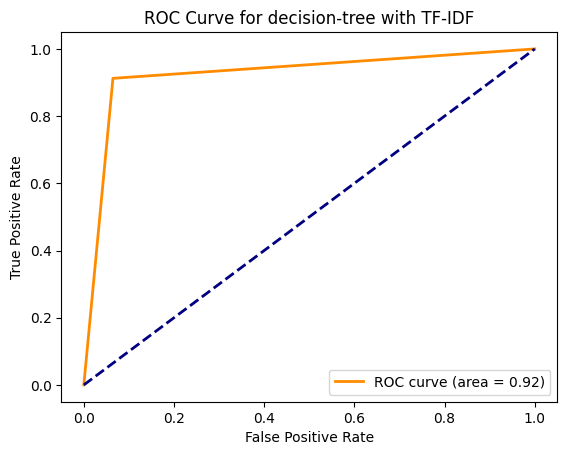


Metrics for Random-Forest with Bag of Words:
Precision: 0.9273298429319372
Recall: 0.9079352060693049
F1-Score: 0.9175300455864069
Confusion Matrix:
[[6125  347]
 [ 449 4428]]
ROC-AUC: 0.9271598156428107


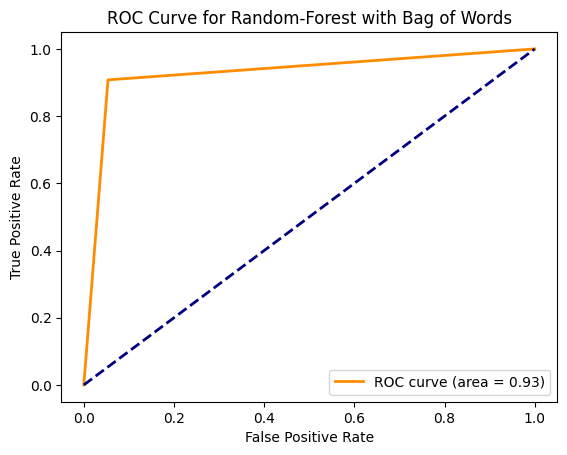


Metrics for Random-Forest with TF-IDF:
Precision: 0.9258793969849246
Recall: 0.906704941562436
F1-Score: 0.9161918574536413
Confusion Matrix:
[[6118  354]
 [ 455 4422]]
ROC-AUC: 0.9260038922892526


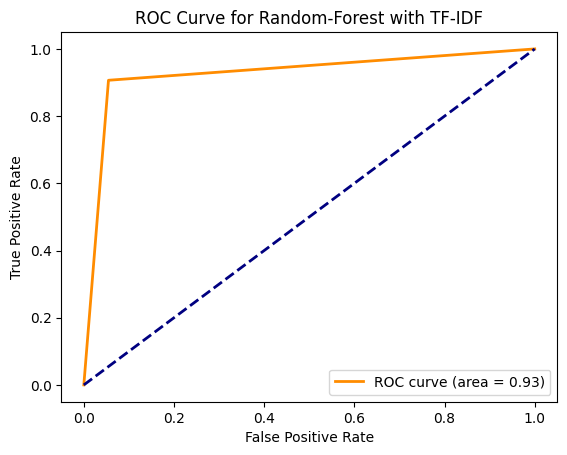


Metrics for Navie-Bayes with Bag of Words:
Precision: 0.8866810938422192
Recall: 0.9241336887430798
F1-Score: 0.9050200803212852
Confusion Matrix:
[[5896  576]
 [ 370 4507]]
ROC-AUC: 0.9175674624185114


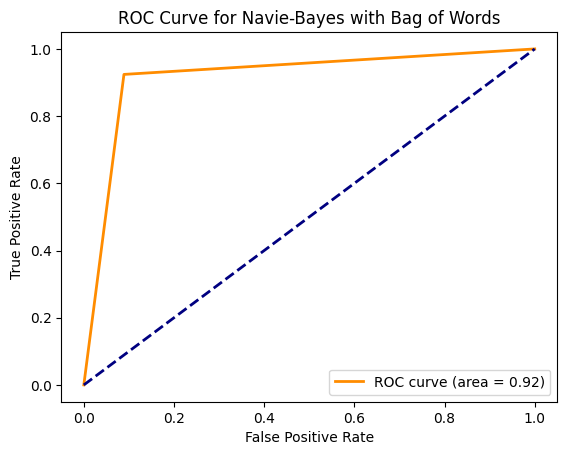


Metrics for Navie-Bayes with TF-IDF:
Precision: 0.9056408129406885
Recall: 0.895427516916137
F1-Score: 0.9005052067223426
Confusion Matrix:
[[6017  455]
 [ 510 4367]]
ROC-AUC: 0.9125623369500339


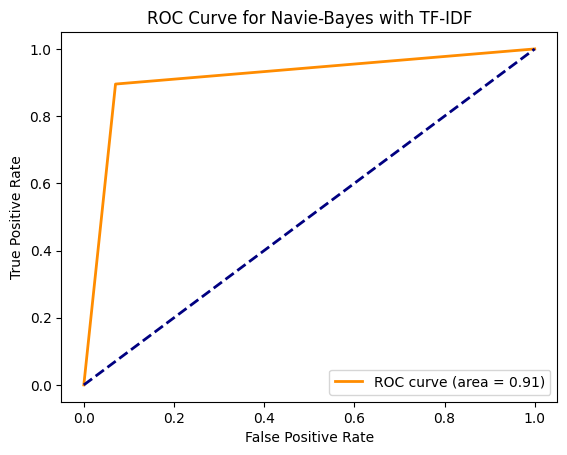


Metrics for K-NN with Bag of Words:
Precision: 0.8760027504011002
Recall: 0.7836784908755382
F1-Score: 0.8272727272727273
Confusion Matrix:
[[5931  541]
 [1055 3822]]
ROC-AUC: 0.8500438189853586


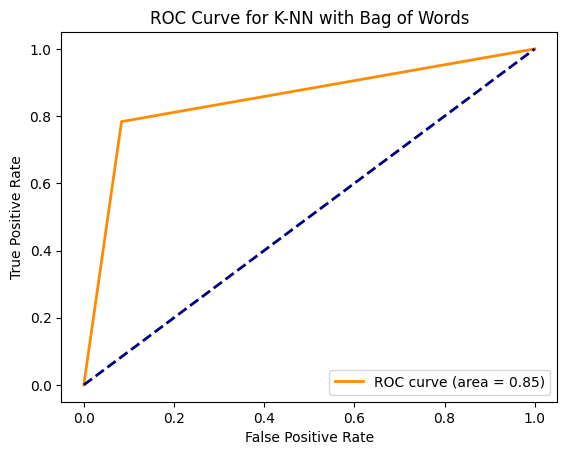


Metrics for K-NN with TF-IDF:
Precision: 0.8945011196815128
Recall: 0.7371334836989952
F1-Score: 0.808228417266187
Confusion Matrix:
[[6048  424]
 [1282 3595]]
ROC-AUC: 0.8358102523562961


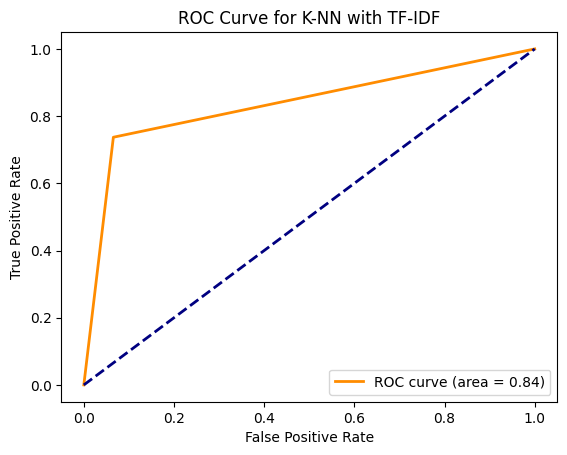


Metrics for SVM with Bag of Words:
Precision: 0.9644286349488662
Recall: 0.8894812384662703
F1-Score: 0.92544
Confusion Matrix:
[[6312  160]
 [ 539 4338]]
ROC-AUC: 0.9323796798017384


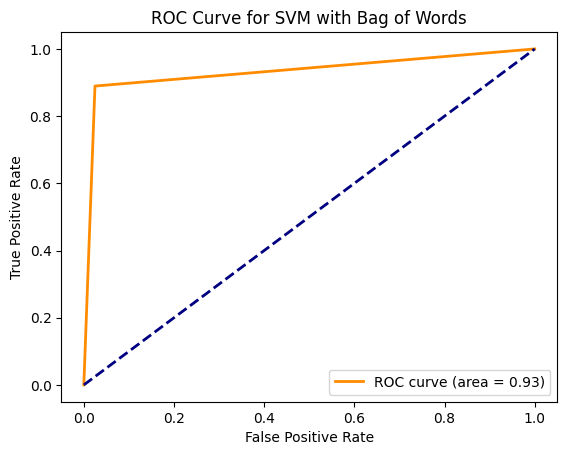


Metrics for SVM with TF-IDF:
Precision: 0.9600260699543776
Recall: 0.9060898093090014
F1-Score: 0.9322784810126582
Confusion Matrix:
[[6288  184]
 [ 458 4419]]
ROC-AUC: 0.9388298243083943


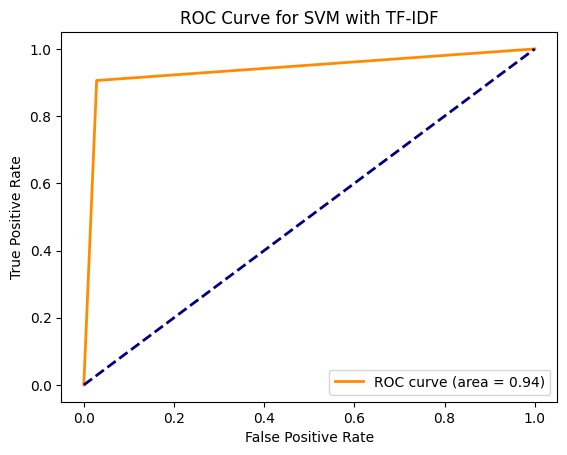

In [ ]:
# Step 4: Evaluate metrics for each classifier and vectorizer
for i, classifier in enumerate(classifiers):
    # Bag of Words
    classifier.fit(X_train_bow, y_train)
    y_pred = classifier.predict(X_test_bow)

    print(f"\nMetrics for {classifier_names[i]} with Bag of Words:")
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")

    print(cm)

    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC-AUC:", roc_auc)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {classifier_names[i]} with Bag of Words')
    plt.legend(loc="lower right")
    plt.show()

    # TF-IDF
    classifier.fit(X_train_tfidf, y_train)
    y_pred_tfidf = classifier.predict(X_test_tfidf)

    print(f"\nMetrics for {classifier_names[i]} with TF-IDF:")
    print("Precision:", precision_score(y_test, y_pred_tfidf))
    print("Recall:", recall_score(y_test, y_pred_tfidf))
    print("F1-Score:", f1_score(y_test, y_pred_tfidf))

    cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
    print("Confusion Matrix:")
    print(cm_tfidf)

    roc_auc_tfidf = roc_auc_score(y_test, y_pred_tfidf)
    print("ROC-AUC:", roc_auc_tfidf)

    # ROC Curve
    fpr_tfidf, tpr_tfidf, _ = roc_curve(y_test, y_pred_tfidf)
    plt.figure()
    plt.plot(fpr_tfidf, tpr_tfidf, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_tfidf))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {classifier_names[i]} with TF-IDF')
    plt.legend(loc="lower right")
    plt.show()